In [1]:
from alphatools.research import run_pipeline, make_factor_plot, make_quantile_plot
from alphatools.ics import Sector, SubIndustry
#from alphatools.fundamentals import Fundamentals
from zipline.pipeline.data import USEquityPricing as USEP
from zipline.pipeline.factors import Returns, AverageDollarVolume, CustomFactor
from zipline.pipeline import Pipeline

<string>:307: UserWarning: Overwriting bundle with name 'futures'


In [2]:
universe = AverageDollarVolume(window_length=120).top(500)

In [3]:
class MyFactor(CustomFactor):
    inputs = [Sector(), SubIndustry()]
    window_length=1
    
    def compute(self, today, assets, out, dat, dat2):
        out[:] = dat2[-1]




In [4]:
p = Pipeline(screen=universe)
p.add(MyFactor(), "MyFactor")
p.add(Sector(), "Sector")

start_date = '2017-01-04'
end_date = '2017-12-28'

df = run_pipeline(p, start_date, end_date)

In [5]:
df

MyFactor  Sector
2017-01-04 00:00:00+00:00 Equity(0 [A])             0.0       0
                          Equity(2 [AAL])           2.0       2
                          Equity(7 [AAP])           7.0       2
                          Equity(8 [AAPL])          8.0       6
                          Equity(12 [ABBV])        11.0       0
                          Equity(13 [ABC])         12.0       2
                          Equity(20 [ABT])         16.0       0
                          Equity(37 [ACN])         26.0       4
                          Equity(45 [ADBE])        28.0       4
                          Equity(48 [ADI])          5.0       4
                          Equity(49 [ADM])         30.0       6
                          Equity(52 [ADP])         32.0       4
                          Equity(53 [ADS])         14.0       2
                          Equity(54 [ADSK])        23.0       4
                          Equity(66 [AEO])         40.0       2
                          Equity(67 [AEP])         36.0       7
                          Equity(71 [AET])         41.0       0
                          Equity(77 [AFL])         43.0       3
                          Equity(85 [AGN])         31.0       0
                          Equity(98 [AIG])         21.0       3
                          Equity(109 [AKAM])       55.0       4
                          Equity(114 [AKS])        56.0       1
                          Equity(116 [ALB])        57.0       1
                          Equity(126 [ALK])        60.0       2
                          Equity(128 [ALL])        21.0       3
                          Equity(136 [ALXN])       17.0       0
                          Equity(138 [AMAT])       24.0       4
                          Equity(145 [AMD])        67.0       4
                          Equity(146 [AME])        68.0       5
                          Equity(149 [AMGN])       17.0       0
...                                                 ...     ...
2017-12-28 00:00:00+00:00 Equity(3045 [VZ])        88.0       4
                          Equity(3055 [WAT])       73.0       0
                          Equity(3056 [WBA])      173.0       2
                          Equity(3066 [WDAY])      28.0       4
                          Equity(3067 [WDC])      126.0       4
                          Equity(3070 [WEC])       36.0       7
                          Equity(3077 [WFC])       98.0       3
                          Equity(3085 [WHR])      188.0       6
                          Equity(3095 [WLL])       93.0       1
                          Equity(3098 [WLTW])      -1.0      -1
                          Equity(3099 [WM])       150.0       5
                          Equity(3101 [WMB])      190.0       1
                          Equity(3105 [WMT])      117.0       2
                          Equity(3117 [WRK])       90.0       6
                          Equity(3122 [WSM])      184.0       2
                          Equity(3142 [WY])       110.0       5
                          Equity(3143 [WYN])       -1.0      -1
                          Equity(3144 [WYNN])     131.0       2
                          Equity(3145 [X])         56.0       1
                          Equity(3148 [XEC])       76.0       1
                          Equity(3149 [XEL])       36.0       7
                          Equity(3150 [XL])        21.0       3
                          Equity(3151 [XLNX])       5.0       4
                          Equity(3156 [XOM])      122.0       1
                          Equity(3162 [XPO])       91.0       2
                          Equity(3163 [XRAY])      73.0       0
                          Equity(3175 [YUM])      105.0       2
                          Equity(3180 [ZBH])       16.0       0
                          Equity(3188 [ZION])     100.0       3
                          Equity(3197 [ZTS])       31.0       0

[124500 rows x 2 columns]

Formatting factor data for: MyFactor
Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Sector
Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 2.18 secs
Time to generate long/short returns: 0.27 secs


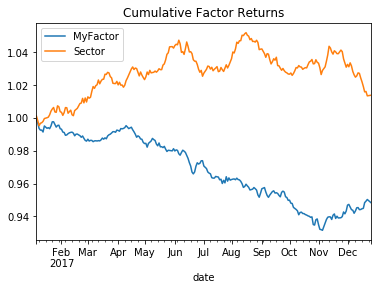

In [6]:
make_factor_plot(df, start_date, end_date);

Formatting factor data for: MyFactor
Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Sector
Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 2.26 secs


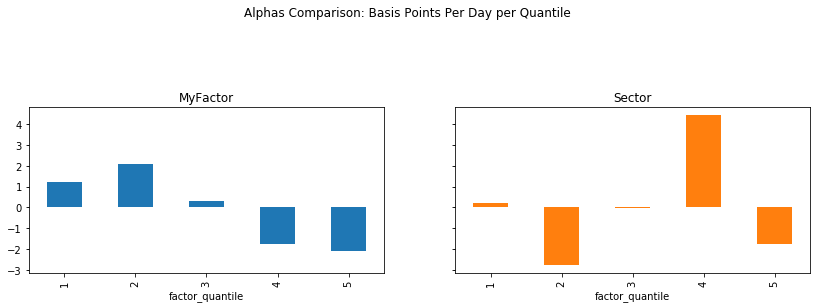

In [7]:
make_quantile_plot(df, start_date, end_date);